# Cadena periódica de N osciladores acoplados

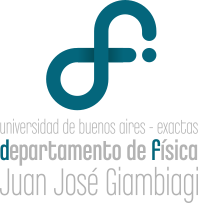  
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  
----

Bibliografía:  
- Sección 3.1  
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

# Enunciado
Enlazadas por resortes de coeficiente de dureza $k$ y longitud natural $l_0$ unas $N$ partículas de masa $m$ en reposo están equiespaciadas en $a$.  
![](figuras/ej1-11.png)
1. Escriba la ecuación de movimiento transversal para la partícula enésima usando la aproximación de ángulos pequeños.
1. Proponga una solución de la forma:
	\\[
		\Psi_{n}^{(p)}(t)=A^{(p)}\cos\left(nk^{(p)}a+\alpha^{(p)}\right)\cos\left(\omega^{(p)}t+\phi^{(p)}\right)
	\\]
	Con ella halle la relación de dispersión.
	¿Depende esta relación de las condiciones de contorno? 
1.  En la figura se muestra el caso de extremos fijos en que una virtual partícula \\(n=0\\) estaría en la pared izquierda y una \\(n= N+1\\) en la derecha.
	Escriba la solución general para la partícula enésima.
	¿Cuánto vale la frecuencia más baja?
	Haga un dibujo cualitativo del movimiento en dicho modo.
1. (*) Ídem. anterior, pero con ambos extremos están libres.
	Tal condición de contorno, a diferencia de la fija, no ejerce ninguna fuerza.
	Esto implica que la longitud de los resortes en los extremos es siempre \\(a\\).
	Puede modelizarse esto imponiento que \\(\Psi_{n=0} = \Psi_{n=1}\\) y \\(\Psi_{n = N} = \Psi_{n = N+1}\\).  
1. (*) Ídem. anterior, pero con el extremo izquierdo libre y el derecho fijo a la pared. 
1. (*) Particularice los resultados de 3, 4 y 5 para el caso en que \\(N = 3\\).
1. (*) Grafique cualitativamente para \\(N=9\\) la relación de dispersión, es decir, \\(\omega^{(p)}\\) en función de \\( k^{(p)} \\).

# 1. Ecuaciones del movimiento transversal

In [1]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
k,a = sym.symbols('k, a', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\Psi_{n}')(t)
psi_nPlus = sym.Function('\Psi_{n+1}')(t)

V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* ( (a**2 + (psi_nPlus- psi_n)**2) + (a**2 + (psi_n- psi_nMinus)**2) ) 
          )
V

In [3]:
m = sym.Symbol('m', positive=True) # parámetros físicos
sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n) ) 

In [4]:
newton_n = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n).simplify() ) 
newton_n

# 2. Hallar la relación de dispersión a partir de la solución propuesta
Antes de hacer este punto haremos un gran rodeo para ver de donde proviene tal solución

## Modos normales

\\[
  m \ddot{\vec{\Psi}} 
  = m \begin{bmatrix} \vdots\\ \ddot{\Psi}_{n+1}\\ \ddot{\Psi}_{n}\\ \ddot{\Psi}_{n+1}\\ \vdots \end{bmatrix} 
  = \begin{bmatrix}
  & & \vdots & & & & \\
  \dots & k & -2k & k & & & \\
  & & k & -2k & k & & \\
  & & & k & -2k & k & \dots \\
  & & & & & \vdots & & \\
  \end{bmatrix}
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots  \end{bmatrix} 
  = \mathbb{K} \vec{\Psi}.
\\]
Se puede proponer la solución exponencial con la misma frecuencia para cada una de las \\(N\\) partículas 
\\[
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots \end{bmatrix} = 
  \begin{bmatrix} \vdots\\ A_{n+1}\\ A_{n}\\ A_{n+1}\\ \vdots \end{bmatrix}
    \operatorname{e}^{i \omega t}
\\]
donde \\(A_i\\) son las amplitudes de dichas oscilaciones.
Reemplazar esta solución en lo anterior nos llevará a tener que resolver un determinante igualado a \\(0\\).
Esto que hicimos para \\(N=2\\) y \\(N=3\\) pero podría ser insoportablemente tedioso para \\(N\gg 1\\).

## Una solución alternativa a resolver el determinante
Dado que hay \\(N\\) partículas sabemos que el método anterior halla sendas soluciones reales, funciones trigonométricas, para los modos en que todas las partículas oscilan con idéntica frecuencia \\(\omega\\) y fase \\(\phi\\).
En estos \\(p\\) modos, entre los \\(N\\) posibles, la partícula \\(n\\) se mueve según

In [5]:
A_p_n  = sym.Symbol('A_n^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')
psi_p_n = sym.Eq(sym.Symbol('\Psi_n^{(p)}'), A_p_n* sym.cos(omega_p * t + phi_p ) )
psi_p_n

donde \\(A_n^{(p)}\\) es la amplitud para la párticula \\(n\\).
Ídem. para las partículas vecinas \\(n-1\\) y \\(n+1\\).

In [6]:
A_p_nMinus, A_p_nPlus  = sym.symbols('A_{n-1}^{(p)}, A_{n+1}^{(p)}')
psi_p_nPlus = sym.Eq(sym.Symbol('\Psi_{n+1}^{(p)}'), A_p_nPlus* sym.cos(omega_p * t + phi_p ) )
psi_p_nMinus = sym.Eq(sym.Symbol('\Psi_{n-1}^{(p)}'), A_p_nMinus* sym.cos(omega_p * t + phi_p ) )
psi_p_nPlus, psi_p_nMinus

Se impone tal solución en la 2.a ecuación de Newton para la partícula \\(n\\)

In [7]:
newton_n

y se obtiene

In [8]:
# A_n  = sym.Symbol('A_n')
# omega = sym.Symbol('\omega', positive=True) # parámetros físicos
# newton_n.subs(psi_n, A_n* sym.exp(sym.I* omega* t))
newton_substituciones={
    psi_n: psi_p_n.rhs,
    psi_nMinus: psi_p_nMinus.rhs,
    psi_nPlus: psi_p_nPlus.rhs,
}
newton_substituido = newton_n.subs(newton_substituciones).simplify()
newton_substituido

De aquí puede despejarse una **relación recursiva de amplitudes**

In [9]:
cos = sym.cos(omega_p * t + phi_p )
newton_substituidoPaso1 = sym.Eq( newton_substituido.lhs.expand()/ cos,
                             newton_substituido.rhs/ cos
                            ).expand()
newton_substituidoPaso1

Se efectua la substitución \\(\omega_0^2 = \frac{k}{m}\\)

In [10]:
omega_0 = sym.Symbol('\omega_0')
newton_substituidoPaso2 = sym.Eq( newton_substituidoPaso1.lhs/m, 
                                 newton_substituidoPaso1.rhs.subs(k, omega_0**2 )
                                )
newton_substituidoPaso2

Se pueden agrupar a un lado de la igualdad solo las amplitudes y del otro frecuencias

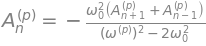

In [11]:
newton_substituidoPaso3 = sym.Eq(A_p_n, sym.solve(newton_substituidoPaso2, A_p_n)[0] )
newton_substituidoPaso3

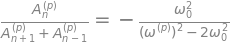

In [12]:
sumaAPlusMinus = newton_substituidoPaso3.rhs.args[3]
newton_substituidoPaso4 = sym.Eq(newton_substituidoPaso3.lhs/ sumaAPlusMinus, newton_substituidoPaso3.rhs/ sumaAPlusMinus)
newton_substituidoPaso4

A la derecha de la igualdad en un cada modo \\(p\\) las \\(\omega\\) son constantes sin dependencia con \\(n\\).
Por tanto la relación de amplitudes a la izquierda se cumple en las \\(N\\) partículas.
Con tres parámetros, \\(\omega^{(p)}\\) y dos \\(A^{(p)}\\) de partículas adyacentes, se pueden obtener las \\(A^{(p)}\\) de todas las demás.

## Amplitudes para cada modo

Sería práctico determinar una formula general para \\(A_n^{(p)}\\) que respete tal relación de amplitudes.
Hay \\(N\\) modos \\(p\\) con sendas relaciones de los \\(A^{(p)}\\) que debieran cumplirse con una única expresión que permita establecer cada \\(A_n^{(p)}\\).


In [13]:
B, C, n, Theta = sym.symbols('B^{(p)}, C^{(p)}, n, \Theta^{(p)}')
únicaA_n_p = sym.Eq(A_p_n, B* sym.cos(n* Theta) + C* sym.sin(n* Theta))
únicaA_n_p

Nuevamente se necesitan tres parámetros para establecer las amplitudes \\(B, C\\) y \\(\Theta\\).

Con las identidades trigonométricas
\\[
    \cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
\\]
\\[
    \sin(a \pm b) = \sin(a) \cos(b) \pm \cos(a) \sin(b)
\\]
en el capitulo 2 de [Waves escrito por D. Morin](https://scholar.harvard.edu/david-morin/waves) se comprueba que ésta expresión satisface el sistema de \\(N\\) ecuaciones para \\(A_n{(p)}\\) y
\\[
\begin{aligned}
A_{n+1} 
= B \cos(n+1)\Theta 
&+ C \sin(n+1)\Theta\\
= B (\cos{n \Theta} \cos{\Theta} - \sin{n \Theta} \sin{\Theta} ) 
&+ C ( \sin{n \Theta} \cos{\Theta} + \cos{n \Theta} \sin{\Theta})\\
= B \left(2 \cos{n \Theta} \cos{\Theta} - ( \cos{n \Theta} \cos{\Theta} \sin{n \Theta} \sin{\Theta} ) \right) 
&+ C \left( 2 \sin{n \Theta} \cos{\Theta} - ( \sin{n \Theta} \cos{\Theta} - \cos{n \Theta} \sin{\Theta} ) \right)\\
= 2 \cos{\Theta} \left( B \cos{n \Theta} - C \sin{n \Theta} \right) 
&- \left( B \cos(n-1)\Theta + C \sin(n-1)\Theta \right)\\
= 2 \cos{\Theta} A_{n} 
&- A_{n-1}\\
\frac{A_{n+1} + A_{n-1} }{A_n} 
= 2 \cos{\Theta}&
\end{aligned}
\\]
Entonces
\\[
\begin{aligned}
\frac{A_{n+1} + A_{n-1} }{A_n} 
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2\\
2 \cos{\Theta}^{(p)}
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2
\end{aligned}
\\]
Que como vimos está igualado a constantes sin dependencia con \\(n\\).

## El número de onda \\(k\\)

En la solución general

In [14]:
psi_p_n

In [15]:
psi_p_n_Theta = psi_p_n.subs(únicaA_n_p.lhs, únicaA_n_p.rhs)
psi_p_n_Theta

la función trigonométrica con \\(t\\) presenta una periodicidad \\(T^{(p)} = \frac{2 \pi}{\omega^{(p)} } \\).
Pero también en \\(A_n^{(p)}\\), hay otra periodicidad con
\\[
    \frac{2 \pi}{\Theta^{(p)}}
\\]
por lo que \\(\Theta^{(p)}\\) puede interpretarse como una frecuencia espacial.
Así como \\(T\\) es una magnitud de tiempo, sería razonable que la de un período espacial es de longitud.

Para lograr esto hay que hacer un cambio de variable a una cuya unidad sea recíproca a la de longitud, e.g. \\(m^{-1}\\).
Así \\(\Psi_n^{(p)}\\) tendrá dependencia espacial con 
\\(
    \cos\left( k^{(p)} x \right) \, \mathrm{y} \, \sin\left( k^{(p)} x \right),
\\) 
donde \\(k^{(p)}\\) que recibe el nombre de **número de onda**, con periodicidad 
\\[
    \lambda^{(p)} = \frac{2 \pi}{k^{(p) } } 
\\] 
que recibe el nombre de **longitud de onda**.

Como las \\(N\\) partículas están equiespaciadas en \\(a\\) su posición es \\(x_n = a n\\), entonces 
\\[
    k^{(p)} = \frac{\Theta^{(p)}}{a},
\\]

In [16]:
k_p = sym.Symbol('k^{(p)}')
psi_p_n_Theta.subs([(Theta, k_p ), (n, n*a ) ] )

Esta solución solo difiere de la propuesta en el enunciado

In [17]:
alpha_p, A_p = sym.symbols(r'\alpha^{(p)}, A^{(p)}')
A_p_n_enunciado = sym.Eq(A_p_n, A_p* sym.cos(n* k_p* a + alpha_p ) )
psi_p_n_enunciado = psi_p_n.subs(A_p_n_enunciado.lhs, A_p_n_enunciado.rhs)
psi_p_n_enunciado

en que los parámetros de \\(A_n^{(p)}\\) son, además de \\(k^{(p)}\\), una amplitud 
\\[
    A^{(p)} = \sqrt{B^{(p)} + C^{(p)} } ,
\\] 
y una fase 
\\[
    \alpha^{(p)} = \arctan \left( \frac{C^{(p)} }{B^{(p)} } \right).
\\]

## Relación de dispersión

Vimos antes como la frecuencia angular y la espacial están relacionadas
\\[
\begin{aligned}
2 \cos{\Theta^{(p)}}
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2\\
2 \cos \left( \frac{k^{(p)}}{a} \right)
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2\\
2 \left( 1 - \cos \left( \frac{k^{(p)}}{a} \right) \right) \omega_0^2
&= \left( \omega^{(p)} \right)^2 \\
2 \left( 2 \sin^2 \left( \frac{k^{(p)}}{2 a } \right) \right) \omega_0^2
&= \left( \omega^{(p)} \right)^2 \\
2\sin \left( \frac{k^{(p)}}{2 a } \right) \omega_0
&= \omega^{(p)}  \\
\end{aligned},
\\]
donde gracias a la identidad trigonométrica 
\\[
    1- \cos{x} = 2 \sin^2 \left(\frac{x}{2} \right)
\\]
se arriba a una expresión que incluye información sobre el medio material, en este caso la periodicidad espacial \\(a\\) de las partículas en la cadena, que recibe el nombre de **relación de dispersión**.

Tal relación la obtuvimos sin estudiar como afecta a la dinámica lo que sucede en los extremos de la cadena.
En efecto, **NO DEPENDE** de las así llamadas condiciones de contorno.

## ¿Cómo determinar la relación de dispersión con los datos del enunciado?

La deducción de la relación partió de conocer la solución

In [18]:
únicaA_n_p

Pero eso no teníamos porque saberlo a priori.

Partamos nuevamente de lo obtenido en el punto anterior, la 2.a ley de Newton para la partícula \\(n\\)

In [19]:
newton_n

Podemos reemplazar en esta ecuación la solución del enunciado

In [20]:
psi_p_n_enunciado

que por claridad en este paso resumiremos en

In [21]:
psi_p_n

y se obtiene

In [22]:
newton_substituidoPaso2

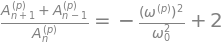

In [23]:
relaciónAmplitudes = sym.Eq(newton_substituidoPaso4.rhs**(-1) , newton_substituidoPaso4.lhs**(-1)
                           ).simplify()
relaciónAmplitudes

Volvemos a expresar la función de las \\(A_n^{(p)}\\)

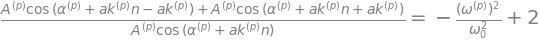

In [24]:
A_p_nPlus_enunciado = A_p_n_enunciado.subs(n, n+1).expand()
A_p_nMinus_enunciado = A_p_n_enunciado.subs(n, n-1).expand()
relaciónDispersión1 = relaciónAmplitudes.subs([(A_p_n, A_p_n_enunciado.rhs),
                                               (A_p_nPlus, A_p_nPlus_enunciado.rhs),
                                               (A_p_nMinus, A_p_nMinus_enunciado.rhs)
                                              ] )
relaciónDispersión1

Usando en el numerador la identidad trigonométrica
\\[
    \cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
\\]
con el argumento \\(b= k^{(p)} a\\) se obtiene

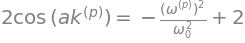

In [25]:
relaciónDispersión2 = relaciónDispersión1.subs(relaciónDispersión1.lhs.args[2], relaciónDispersión1.lhs.args[2].trigsimp() )
relaciónDispersión2

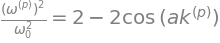

In [26]:
relaciónDispersión3 = sym.Eq((omega_p/ omega_0)**2 , sym.solve(relaciónDispersión2.lhs- relaciónDispersión2.rhs, (omega_p/ omega_0)**2 )[0])
relaciónDispersión3

Con la identidad trigonométrica 
\\[
    1- \cos{x} = 2 \sin^2 \left( \frac{x}{2} \right)
\\]
puede re-escribirse como

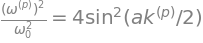

In [27]:
relaciónDispersión4 = relaciónDispersión3.subs(relaciónDispersión3.rhs, 4* sym.sin(k_p* a/ 2)**2 )
relaciónDispersión4

Y de aquí la relación de dispersión

In [28]:
relaciónDispersión5 = sym.Eq(omega_p, sym.solve(relaciónDispersión4.lhs- relaciónDispersión4.rhs, omega_p)[1] )
relaciónDispersión5

# 3. ¿Cómo determinar los \\(k^{(p)}\\)? Caso de extremos fijos

De la solución del enunciado, solo nos ocupa la parte espacial

In [29]:
A_p_n_enunciado

Solo sabemos que \\(A_{n=0}^{(p)}=0\\) y \\(A_{N+1=0}^{(p)}=0\\).
Tales _partículas_ no son reales sino unas virtuales que nos sugiere el enunciado imaginemos estarían donde está la pared.
En el caso de \\(n=0\\)

In [30]:
A_p_n0 = A_p_n_enunciado.subs([(A_p_n,0), (n,0)])
A_p_n0

In [31]:
alpha_p_sol = sym.solve(A_p_n0.rhs, alpha_p)
alpha_p_sol

De estas soluciones puede elegirse cualquiera que nos servirán para todos los modos \\(p\\).
Puesto que \\(\cos\left(x+\frac{3\pi}{2}\right) = \sin{x}\\) eligiendo la segunda la parte espacial de la solución es

In [32]:
A_p_n_n0_sol = A_p_n_enunciado.subs(alpha_p, alpha_p_sol[1])
A_p_n_n0_sol

En el otro extremo, en \\(n=N+1\\), tendríamos \\(A_{n= N+1} = 0\\)

In [33]:
N = sym.Symbol('N')
A_p_NPlus = A_p_n_n0_sol.subs([(A_p_n,0), (B,0), (n,N+1)])
A_p_NPlus

In [34]:
k_p_sol = sym.solve(A_p_NPlus.rhs, k_p)
k_p_sol

Si probamos la segunda solución en la condición veremos que también son válidos todos los múltiplos en \\(p\\) de la misma

In [35]:
p = sym.Symbol('p')
A_p_NPlus.subs(k_p, p* k_p_sol[1])

Así hallamos los números de ondas determinados por las condiciones de contorno

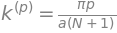

In [36]:
k_p_fijoFijo = sym.Eq(k_p, p* k_p_sol[1])
k_p_fijoFijo

con \\(p \in \mathbb{N}\\).

Con la relación de dispersión se obtienen las correspondientes frecuencias

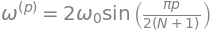

In [37]:
omega_p_fijoFijo = relaciónDispersión5.subs(k_p, k_p_fijoFijo.rhs)
omega_p_fijoFijo

Y esta expresión es la que deja en claro porque se identificó con \\(p\\) el entero que impone los posibles \\(k^{(p)} \\).
Con \\(N\\) grados de libertad las frecuencias (y modos) posibles son todos los \\(p \leq N\\) con \\(p \in \mathbb{N}\\).
Si en la expresión para \\(\omega^{(p)}\\) se multiplicara por el entero \\(N+1\\) tal frecuencia sería nula, y si se lo hiciera por un entero \\(> N+1\\), ¡negativa!

## Solución general para el caso fijo-fijo

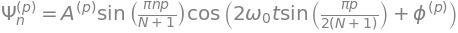

In [38]:
condiciones_fijoFijo = {
    alpha_p: alpha_p_sol[1],
    k_p : k_p_fijoFijo.rhs,
    omega_p : omega_p_fijoFijo.rhs,
}
psi_p_n_enunciado.subs(condiciones_fijoFijo)

## Modo más bajo del caso fijo-fijo

Puesto que \\(p \leq N \\) con \\(p \in \mathbb{N}\\) la frecuencia \\(\omega^{(p)}\\) alcanza su mayor valor en \\(p=N\\), sin nunca llegar a ser \\(2 \omega_0\\) y el menor corresponde a \\(p=1\\)

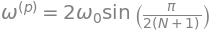

In [39]:
omega_p_fijoFijo.subs(p,1)

Para responder al interrogante de como es el movimiento en este modo es práctico graficar las \\(A_n^{(p)}\\) de cada \\(n\\), en este caso para \\(p=1\\).

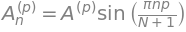

In [40]:
A_p_n_fijoFijo_substituciones = {
    k_p: k_p_fijoFijo.rhs,
    alpha_p: alpha_p_sol[1],
}
A_p_n_fijoFijo = A_p_n_enunciado.subs(A_p_n_fijoFijo_substituciones)
A_p_n_fijoFijo

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('fivethirtyeight') # estilo de gráficos con grilla y letras grandes
import ipywidgets as iwy

In [42]:
def A_p_n_fijoFijo_interactivo(N_magnitud = 7, p_magnitud = 1):
    a_magnitud = 0.1 # [m] separación de partículas
    A_p_magnitud = 0.1 # [m]
    A_p_n_fijoFijo_magnitudes = {
        p: p_magnitud,
        N: N_magnitud,
        A_p: A_p_magnitud
    }

    n_vector = np.arange(1, N_magnitud+1) # vector de n particulas
    x_n = a_magnitud* n_vector # posición de particulas
    x_lim = [0, (N_magnitud+ 1)* a_magnitud]
    n_continuo =  np.linspace(x_lim[0], x_lim[1], num= 80)
    
    A_n_función = sym.lambdify(n, A_p_n_fijoFijo.rhs.subs(A_p_n_fijoFijo_magnitudes ), modules= 'numpy' )
    A_n_discreto = A_n_función(n_vector) # amplitud oscilación de partículas
    A_n_continuo = A_n_función(n_continuo/ a_magnitud) # (ojo, n= x/a) amplitud oscilación de partículas

    fig = plt.figure(figsize= (12, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlim(x_lim)
    ax.set_ylim(-1.2* A_p_magnitud, 1.2* A_p_magnitud)
    ax.set_xlabel('x [m]', fontsize = 14)
    ax.set_ylabel('A [m]', fontsize = 14)

    ax.plot(n_continuo, A_n_continuo, '-c') # trazo
    ax.plot(x_n, A_n_discreto, 'ob', markersize=15 ) # partículas
    fig.show()

In [43]:
iwy.interact(A_p_n_fijoFijo_interactivo,
             N_magnitud = iwy.widgets.IntSlider(value= 9, min= 9, max= 27, description='$N$'),
             p_magnitud = iwy.widgets.IntSlider(value= 1, min= 1, max= 9, description=r'$p \leq N$'),
            )

interactive(children=(IntSlider(value=9, description='$N$', max=27, min=9), IntSlider(value=1, description='$p…

<function __main__.A_p_n_fijoFijo_interactivo(N_magnitud=7, p_magnitud=1)>

# 4. Extremos libres

Comenzamos por \\(A_{n=0} = A_{n=1}\\)

In [44]:
n0Libre= sym.Eq( A_p_n_enunciado.rhs.subs([(A_p_n,0), (n,0) ] ),
                A_p_n_enunciado.rhs.subs([(A_p_n,0), (n,1) ] ) 
               )
n0Libre

¿Cuando los cosenos de estos argumentos son iguales sin necesariamente ser los argumentos iguales? 
El coseno tiene simetría en el eje de las abcisas \\( \implies cos(x) = \cos(2 \pi- x)\\)
\\[
    \begin{aligned}
    \alpha^{(p)} &= 2 \pi -\alpha^{(p)} - a k^{(p)} + q 2 \pi \qquad (q \in \mathbb{Z}) \\
    2 \alpha^{(p)} &= - a k^{(p)} + (q-1) 2 \pi ,
    \end{aligned}
\\]
donde agregamos la posibilidad de sumar o restar \\(q 2 \pi\\) a un argumento.

En el otro extremo de la cadena \\(A_{n=N} = A_{n=N+1}\\)

In [45]:
NPlusLibre= sym.Eq( A_p_n_enunciado.rhs.subs([(A_p_n,0), (n,N) ] ),
                A_p_n_enunciado.rhs.subs([(A_p_n,0), (n,N+1) ] ) 
               )
NPlusLibre

\\[
    \begin{aligned}
    N a k^{(p)} + \alpha^{(p)} &= 2 \pi - \alpha^{(p)} - N a k^{(p)} - a k^{(p)} + r 2 \pi  \qquad (r \in \mathbb{Z}) \\
    2 N a k^{(p)} + 2 \alpha^{(p)} &= - a k^{(p)} + (r+1) 2 \pi\\
    \end{aligned}
\\]
De reemplazar la relación anterior en esta última se obtiene
\\[
    \begin{aligned}
    2 N a k^{(p)} + 2 \alpha^{(p)} &= - a k^{(p)} + (r+1) 2 \pi\\
    2 N a k^{(p)} - a k^{(p)} + (q-1) 2 \pi &= - a k^{(p)} + (r+1) 2 \pi\\
    2 N a k^{(p)} &= (r- q + 2) 2 \pi\\
    2 N a k^{(p)} &= p 2 \pi \qquad (p \in \mathbb{N_0}) \\
    \end{aligned}
\\]
El número de modo puede ser nulo para contemplar que un sistema libre se desplace sin oscilar, \\(\omega^{(p = 0)} = 0\\), ergo \\(p \in \mathbb{N_0}\\). 

In [46]:
k_p_libreLibre = sym.Eq(k_p, p* sym.pi/(N* a) )
k_p_libreLibre

De la relación en la pared de \\(n=0\\) 
\\[
    \begin{aligned}
    2 \alpha^{(p)} &= - a k^{(p)} + (q-1) 2 \pi\\
    \alpha^{(p)} &= - \frac{a k^{(p)}}{2} + (q-1) \pi ,
    \end{aligned}
\\] 
podemos elegir el \\(\alpha^{(p)}\\) para \\(q-1 = 0\\)

In [47]:
alpha_p_libreLibre = sym.Eq(alpha_p, -(a/ 2)* k_p_libreLibre.rhs )
alpha_p_libreLibre

Finalmente de la relación de dispersión

In [48]:
omega_p_fijoFijo = relaciónDispersión5.subs(k_p, k_p_libreLibre.rhs)
omega_p_fijoFijo

## Solución general para el caso de extremos libres

In [49]:
condiciones_libreLibre = {
    k_p : k_p_libreLibre.rhs,
    alpha_p : alpha_p_libreLibre.rhs,
    omega_p : omega_p_fijoFijo.rhs,
}
A_p_n_libreLibre = A_p_n_enunciado.subs(condiciones_libreLibre)
A_p_n_libreLibre

In [50]:
psi_p_n_enunciado.subs(condiciones_libreLibre)

# 5. Un extremo fijo y el otro libre
Tarea

# 6. \\(N=3\\)
Lo haremos para el caso de extremos libres, el resto de los casos es tarea.
Con \\(N=3\\) en este caso son posibles \\(p=0,1,2\\).

Con los \\(A_n^{(p)}\\) puede formarse el vector de amplitudes \\(\vec{A}^{(p)}\\).

In [51]:
A_vector_p_libreLibre = sym.Eq(sym.Symbol(r'\vec{A}^{(p)}'), 
                    sym.Matrix([
                        A_p_n_libreLibre.rhs.subs([(n,1), (N,3) ] ),
                        A_p_n_libreLibre.rhs.subs([(n,2), (N,3) ] ),
                        A_p_n_libreLibre.rhs.subs([(n,3), (N,3) ] ),
                    ] ),
                    evaluate = False
                   )
A_vector_p_libreLibre

                 ⎡             ⎛π⋅p⎞ ⎤
                 ⎢ A__{(p)}⋅cos⎜───⎟ ⎥
                 ⎢             ⎝ 6 ⎠ ⎥
                 ⎢                   ⎥
                 ⎢             ⎛π⋅p⎞ ⎥
\vec{A}__{(p)} = ⎢ A__{(p)}⋅cos⎜───⎟ ⎥
                 ⎢             ⎝ 2 ⎠ ⎥
                 ⎢                   ⎥
                 ⎢            ⎛5⋅π⋅p⎞⎥
                 ⎢A__{(p)}⋅cos⎜─────⎟⎥
                 ⎣            ⎝  6  ⎠⎦

Si de este extraemos \\(A^{(p)}\\) tendremos los autovectores \\(\vec{\xi}^{(p)}\\), que podemos comparar con los que conocemos del análisis matricial.

In [52]:
xi_p_libreLibre = sym.Eq(sym.Symbol(r'\vec{\xi}^{(p)}'),
                               A_vector_p_libreLibre.rhs.subs(A_p, 1),
                         evaluate = False
                              )
xi_p_libreLibre

                   ⎡    ⎛π⋅p⎞ ⎤
                   ⎢ cos⎜───⎟ ⎥
                   ⎢    ⎝ 6 ⎠ ⎥
                   ⎢          ⎥
                   ⎢    ⎛π⋅p⎞ ⎥
\vec{\xi}__{(p)} = ⎢ cos⎜───⎟ ⎥
                   ⎢    ⎝ 2 ⎠ ⎥
                   ⎢          ⎥
                   ⎢   ⎛5⋅π⋅p⎞⎥
                   ⎢cos⎜─────⎟⎥
                   ⎣   ⎝  6  ⎠⎦

Para el modo \\(p=0\\), de MRU, esperamos que todos tengan el mismo desplazamiento.

In [53]:
xi_p_libreLibre.rhs.subs(p,0)

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

En los modos de oscilación el centro de masa no se deplaza.
En el modo \\(p=1\\), el de menor frecuencia (energía), solo las partículas de los extremos debieran desplazarse y lo harían en contrafase.

In [54]:
xi_p_libreLibre.rhs.subs(p,1)

⎡ √3 ⎤
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢-√3 ⎥
⎢────⎥
⎣ 2  ⎦

En el modo de \\(p=2\\) la partícula central debiera desplazarse en sentido opuesto a las de los extremos.

In [55]:
xi_p_libreLibre.rhs.subs(p,2)

⎡1/2⎤
⎢   ⎥
⎢-1 ⎥
⎢   ⎥
⎣1/2⎦

# 7. Graficar relación de dispersión
Tarea